

##Clothing Size Predicition

In [ ]:

import numpy as np # linear algebra
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datamining/tugas/data/final_test.csv')
df.head()

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


In [ ]:
df.dtypes

weight      int64
age       float64
height    float64
size       object
dtype: object

In [ ]:
df.isna().sum()

weight      0
age       257
height    330
size        0
dtype: int64

In [ ]:
df= df.dropna()

In [ ]:
df['height'] = df['height'].astype(int)
df['age'] = df['age'].astype(int)

<ipython-input-6-63df26f59210>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['height'] = df['height'].astype(int)
<ipython-input-6-63df26f59210>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['age'].astype(int)


In [ ]:
df['size'].value_counts()

M       29575
S       21829
XXXL    21259
XL      19033
L       17481
XXS      9907
XXL        69
Name: size, dtype: int64

###Data Visualization

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Height (cm)'),
 Text(0.5, 1.0, 'Histogram')]

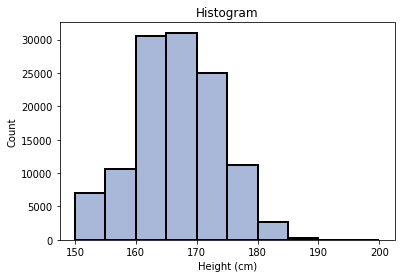

In [ ]:
bins = [150, 155,160, 165, 170, 175, 180, 185, 190, 195, 200]


ax = sns.histplot(data=df, x='height', bins=bins, color=sns.color_palette('Set2')[2], linewidth=2)
ax.set(title='Histogram', xlabel='Height (cm)', ylabel='Count')


[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Age'), Text(0.5, 1.0, 'Histogram')]

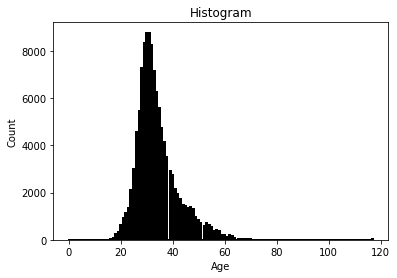

In [ ]:
ax = sns.histplot(data=df, x='age', color=sns.color_palette('Set2')[2], linewidth=2)
ax.set(title='Histogram', xlabel='Age', ylabel='Count')

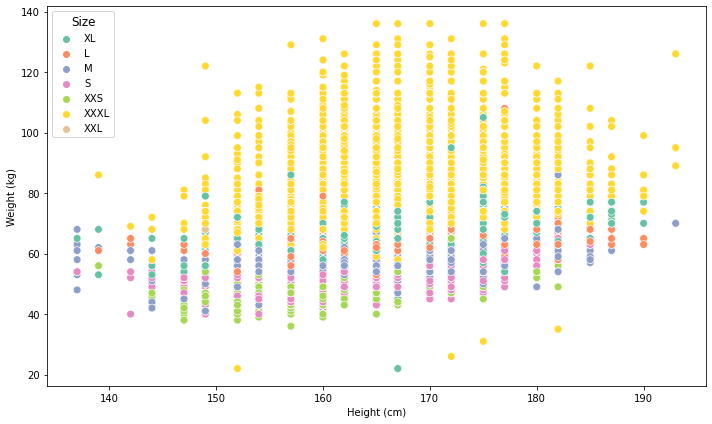

In [ ]:
plt.figure(figsize=(10,6), tight_layout=True)
ax = sns.scatterplot(data=df, x='height', y='weight',   hue='size', palette='Set2', s=60)
ax.set(xlabel='Height (cm)', ylabel='Weight (kg)')
ax.legend(title='Size', title_fontsize = 12) 
plt.show()

###Data Manipulation & Feature Engineering

In [ ]:
df = df.loc[(df['age'] >= 20.0) & (df['age'] <= 60)]
print('Min value: ', df['age'].min())
print('Max value: ',df['age'].max())

Min value:  20
Max value:  60


In [ ]:
df['size'].value_counts()

M       29191
S       21515
XXXL    20809
XL      18785
L       17249
XXS      9760
XXL        66
Name: size, dtype: int64

In [ ]:
print('Average height for XXS clothes: ',df.loc[df['size'] == 'XXL']['height'].mean(), ' and average weight: ', df.loc[df['size'] == 'XXS']['weight'].mean())
print('Average height for S clothes: ',df.loc[df['size'] == 'S']['height'].mean(),' and average weight: ', df.loc[df['size'] == 'S']['weight'].mean())
print('Average height for M clothes: ',df.loc[df['size'] == 'M']['height'].mean(),' and average weight: ', df.loc[df['size'] == 'M']['weight'].mean())
print('Average height for L clothes: ',df.loc[df['size'] == 'L']['height'].mean(),' and average weight: ', df.loc[df['size'] == 'L']['weight'].mean())
print('Average height for XL clothes: ',df.loc[df['size'] == 'XL']['height'].mean(),' and average weight: ', df.loc[df['size'] == 'XL']['weight'].mean())
print('Average height for XXL clothes: ',df.loc[df['size'] == 'XXL']['height'].mean(),' and average weight: ', df.loc[df['size'] == 'XXL']['weight'].mean())
print('Average height for XXXL clothes: ',df.loc[df['size'] == 'XXXL']['height'].mean(),' and average weight: ', df.loc[df['size'] == 'XXXL']['weight'].mean())

Average height for XXS clothes:  159.53030303030303  and average weight:  50.55
Average height for S clothes:  163.35022077620266  and average weight:  54.122333255868
Average height for M clothes:  165.09293960467267  and average weight:  58.22558322770717
Average height for L clothes:  166.5494231549655  and average weight:  62.27908864281987
Average height for XL clothes:  167.25323396326857  and average weight:  65.61272291722119
Average height for XXL clothes:  159.53030303030303  and average weight:  66.4090909090909
Average height for XXXL clothes:  167.4429333461483  and average weight:  76.0180691047143


In [ ]:
df = df[df['size']!= 'XXL']

In [ ]:
df["size"].replace({"XXS": "XS", "XXXL": "XXL"}, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df["size"].value_counts()

M      29191
S      21515
XXL    20809
XL     18785
L      17249
XS      9760
Name: size, dtype: int64

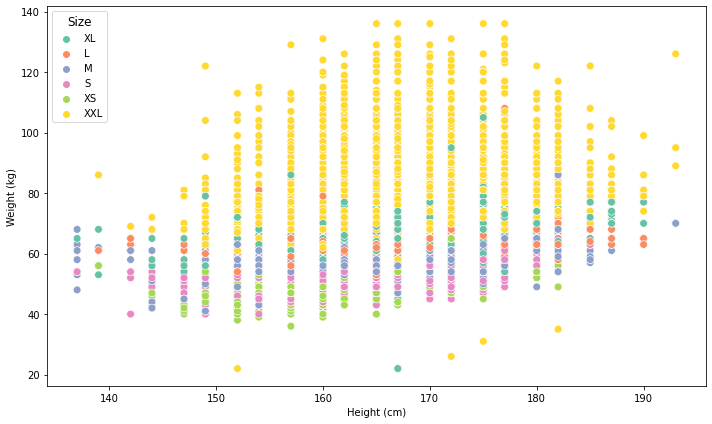

In [ ]:
plt.figure(figsize=(10,6), tight_layout=True)
ax = sns.scatterplot(data=df, x='height', y='weight',   hue='size', palette='Set2', s=60)
ax.set(xlabel='Height (cm)', ylabel='Weight (kg)')
ax.legend(title='Size', title_fontsize = 12) 
plt.show()

###Model building

In [ ]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1]
y = df['size']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 1/3)

###Penerapan Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Accuracy:")
print(accuracy_score(y_test, predictions))

Accuracy:
0.5036186481855612


In [ ]:
y_test

64859       M
2754        M
92658     XXL
73007       S
5652        L
         ... 
39121     XXL
73765     XXL
42681       S
28054     XXL
118188      M
Name: size, Length: 39103, dtype: object

In [ ]:
d = {'weight':[100], 'age': [23], 'height': [175]}
Me = pd.DataFrame(data=d)
Me

,weight,age,height
0,100,23,175


In [ ]:
model.predict(Me)[0]


'XXL'